In [68]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data


In [69]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,22,1,0,0,0,1


In [70]:
cols_to_drop = df.loc[:, (df == -1).all() | (df == 0).all()]
df.drop(cols_to_drop, inplace=True, axis=1)


## Extra Data Cleaning
Here we fix the title of the jobs, we also add a column name *seniority* that shows whether the job title is senior or not. 

In [71]:
def fix_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'snr' in title.lower() or 'sr' in title.lower() or 'manager' in title.lower() or\
    'director' in title.lower() or 'principle' in title.lower() or 'leader' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower() or 'intern' in title.lower():
        return 'junior'
    else:
        return 'na'        

In [72]:
df['job_title'] = df['job title'].apply(fix_title)
df['job_title'].value_counts()

data scientist    279
na                184
data engineer     119
data analyst      102
mle                22
manager            22
director           14
Name: job_title, dtype: int64

In [73]:
df['seniority'] = df['job title'].apply(seniority)
df['seniority'].value_counts()

na        524
senior    213
junior      5
Name: seniority, dtype: int64

In [74]:
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel,job_title,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,47,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,10,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,22,1,0,0,0,1,data scientist,na


In [75]:
df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'headquarters', 'size', 'founded',
       'type of ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_title', 'seniority'],
      dtype='object')

In [76]:
df['job_state'] = df['job_state'].apply(lambda x:x.strip() if x.strip() != 'Los Angeles' else 'CA')

We find the length of job description for each job.

In [77]:
df['desc_len'] = df['job description'].apply(lambda x: len(x))

In [78]:
# Number of competitors

df['num_comp'] = df['competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [79]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [80]:
df['same_state'] = df.apply(lambda x: 1 if x.location == x.headquarters else 0, axis=1)

In [81]:
df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'headquarters', 'size', 'founded',
       'type of ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_title', 'seniority', 'desc_len', 'num_comp',
       'same_state'],
      dtype='object')

In [82]:
df.to_csv('eda_data.csv', index=False)

## Univariate Analysis

In [83]:
df.describe()

,rating,founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,same_state
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908,0.557951
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239,0.496965
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,1.000000


We want to see the histogram of our numerical variables.

In [84]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['rating',
 'founded',
 'hourly',
 'employer_provided',
 'min_salary',
 'max_salary',
 'avg_salary',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel',
 'desc_len',
 'num_comp',
 'same_state']

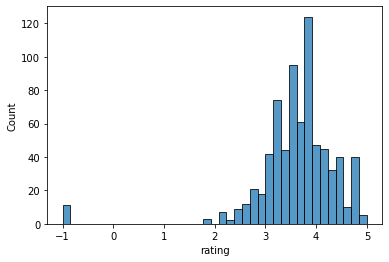

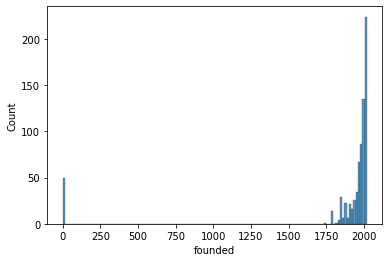

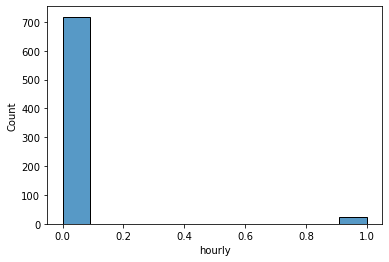

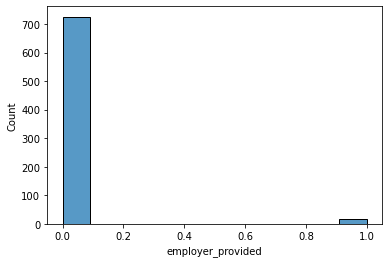

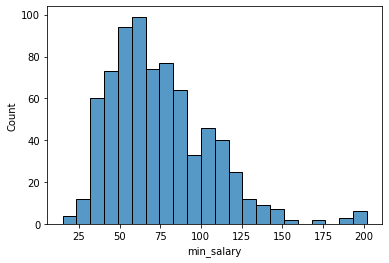

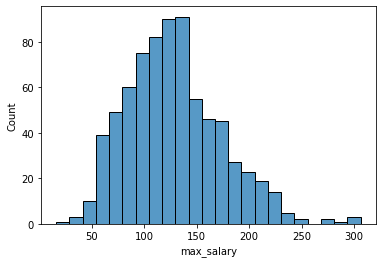

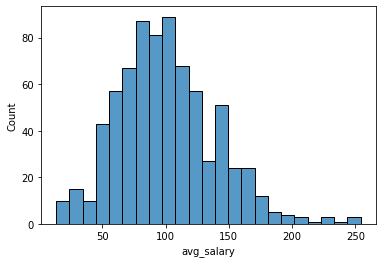

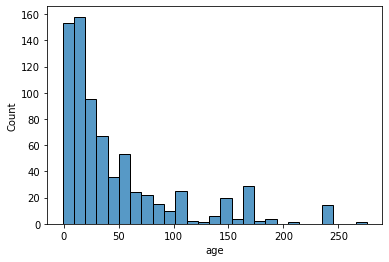

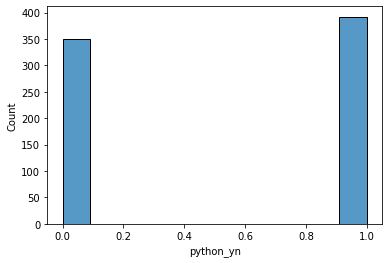

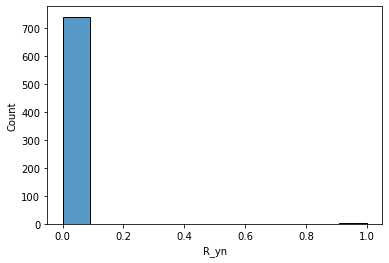

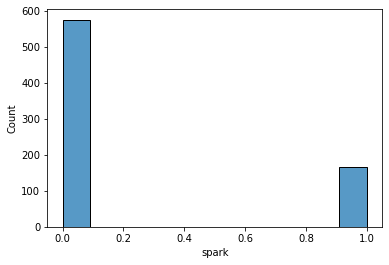

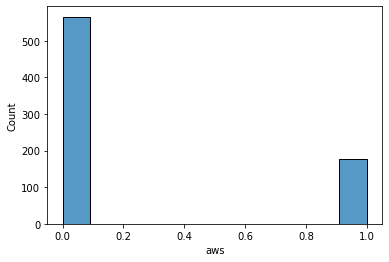

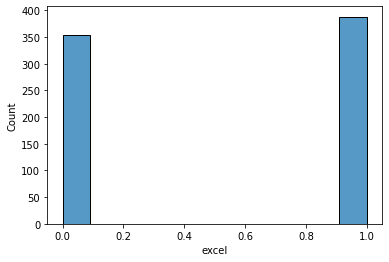

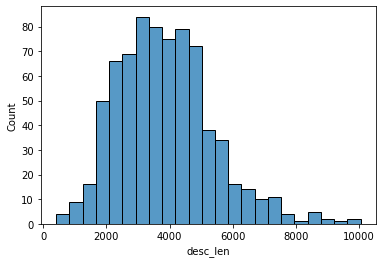

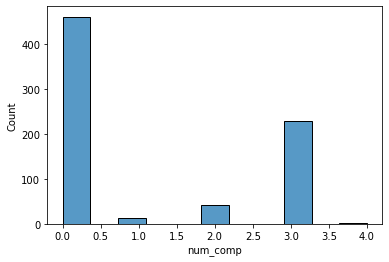

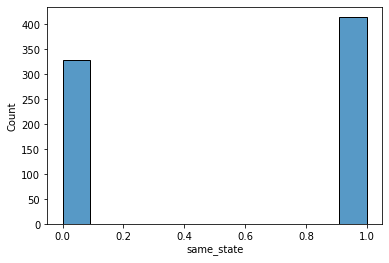

In [85]:
for col in num_cols:
    plt.figure()
    sns.histplot(x=col, data=df)

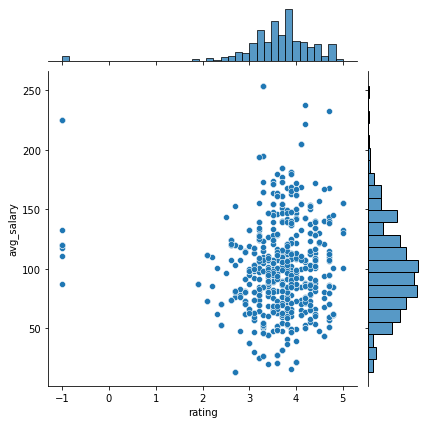

In [86]:
sns.jointplot(x='rating', y='avg_salary', data=df);

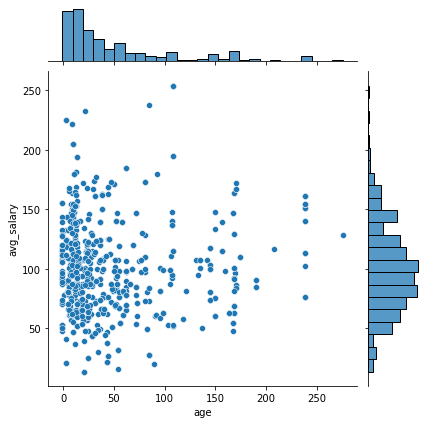

In [87]:
sns.jointplot(x='age', y='avg_salary', data=df);

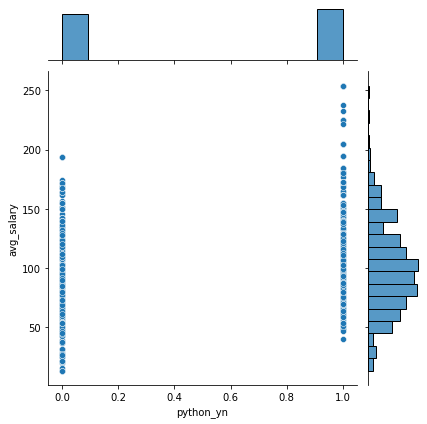

In [88]:
sns.jointplot(x='python_yn', y='avg_salary', data=df);

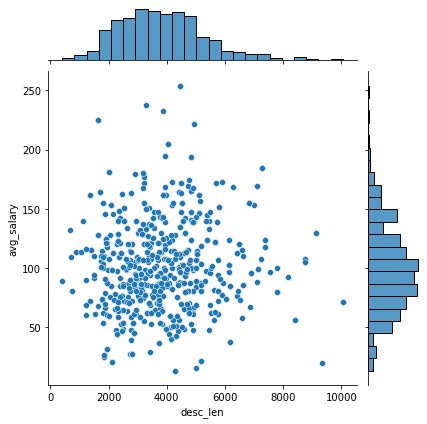

In [89]:
sns.jointplot(x='desc_len', y='avg_salary', data=df);

In [90]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['job title',
 'salary estimate',
 'job description',
 'company name',
 'location',
 'headquarters',
 'size',
 'type of ownership',
 'industry',
 'sector',
 'revenue',
 'competitors',
 'company_txt',
 'job_state',
 'job_title',
 'seniority']

We now take a look at correlations between numerical variables.

The above chart shows that there is relatively high correlation between *rating* and 'age', also between 'desc_len' and 'age'. 

Now we visualize categorical variables.

graph for size, total=9


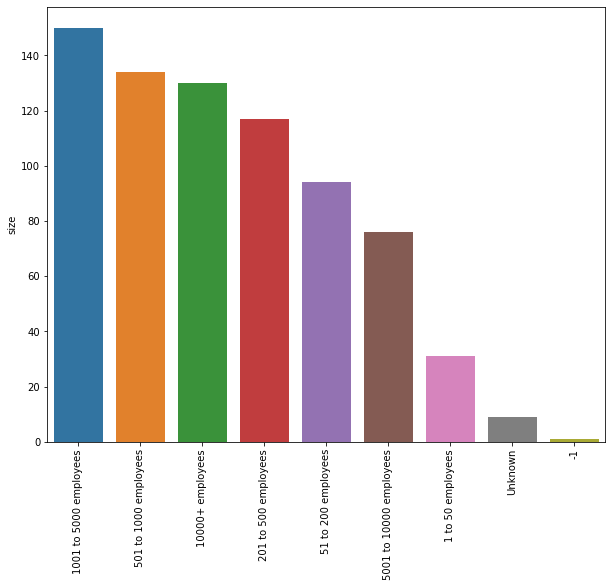

graph for type of ownership, total=11


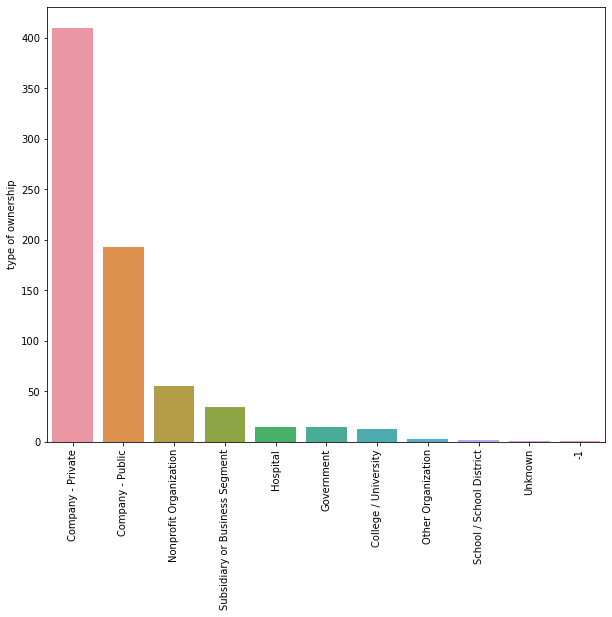

graph for sector, total=25


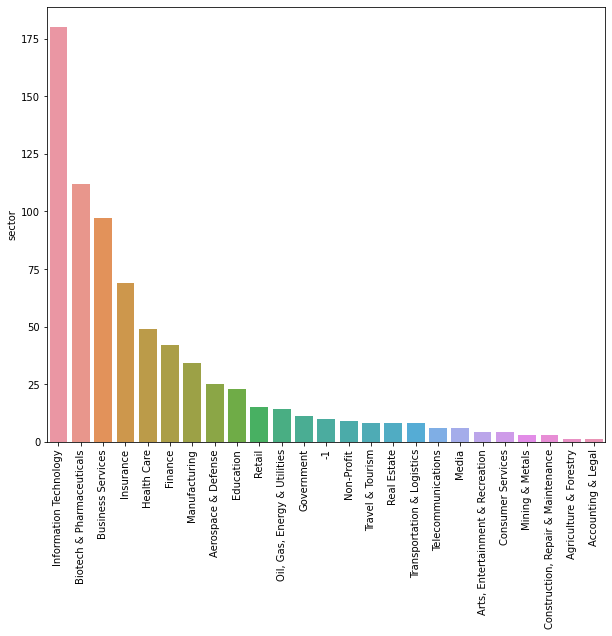

graph for seniority, total=3


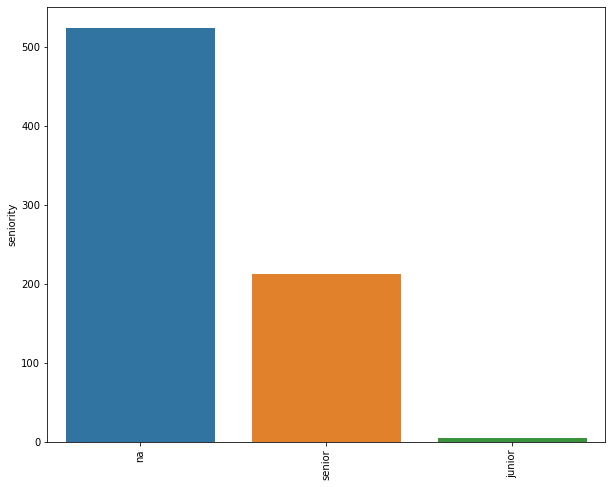

graph for job_state, total=37


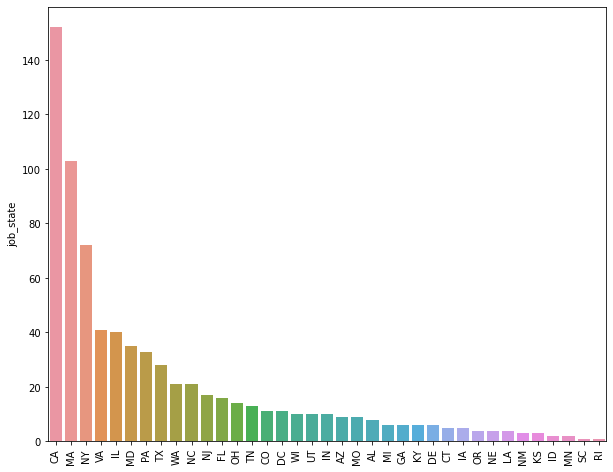

graph for revenue, total=14


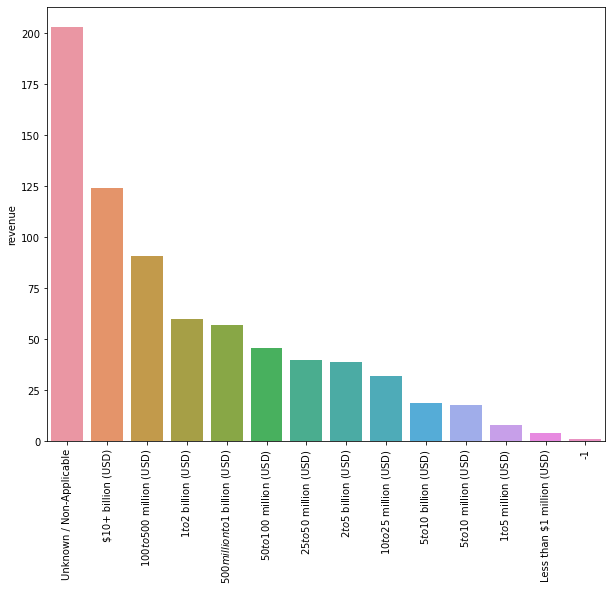

In [91]:
df_cat = df[['size', 'type of ownership', 'sector', 'seniority', 'job_state', 'revenue']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

In [92]:
mask = df['size'] == 'Unknown'
df.loc[mask, 'size'] = '-1'

mask = df['type of ownership'] == 'Unknown'
df.loc[mask, 'type of ownership'] = '-1'

mask = df['revenue'] == 'Unknown / Non-Applicable'
df.loc[mask, 'revenue']='-1'


For better visualisation in high-dimensional variables, we select top 20 variables and visualise those variables.

graph for company_txt, total=20


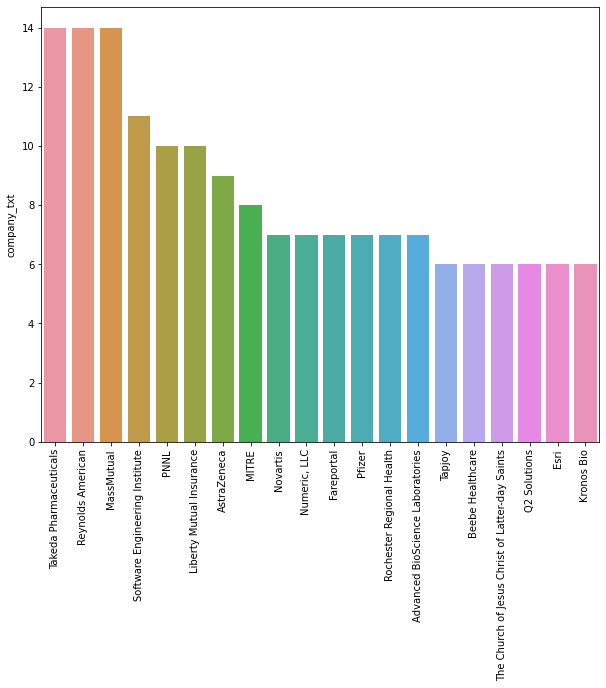

graph for location, total=20


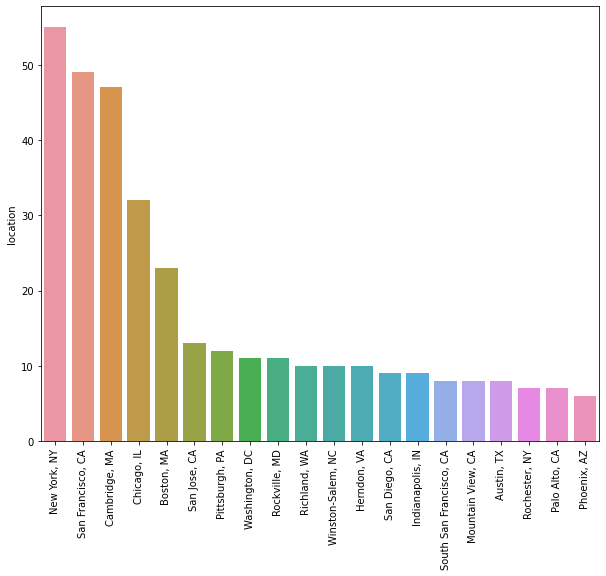

In [93]:
df_cat = df[['company_txt', 'location']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()[:20]
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()